In [1]:
import pandas as pd

df = pd.read_csv('./data/naver_shopping_tokenized_review_and_prediction_by_models.csv', sep = ',', encoding = 'utf-8', index_col = 0)
print(df.dtypes)
print(len(df))
df.head()

Score                    int64
Review                  object
y                        int64
tokenized_1             object
tokenized_2             object
DTM_tk1_prediction       int64
TFIDF_tk1_prediction     int64
DTM_tk2_prediction       int64
TFIDF_tk2_prediction     int64
dtype: object
199572


,Score,Review,y,tokenized_1,tokenized_2,DTM_tk1_prediction,TFIDF_tk1_prediction,DTM_tk2_prediction,TFIDF_tk2_prediction
0,5,배공빠르고 굿,1,배공 빠르고,배공 빠르고 굿,1,1,1,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0,택배 엉망 놔두고가고,택배 엉망 이네 용 집 밑 층 없이 놔두고가고,0,0,0,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 박음질이 조금 ...,1,아주 좋아요 바지 정말 좋아서 구매 가격 대박 입니다 박음질 어설프다하긴 편하고 가...,아주 좋아요 바지 정말 좋아서 2 구매 가격 대박 입니다 . 박음질 어설프다하긴 편...,1,1,1,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0,선물 받아서 전달 했어야 하는 상품 이었는데 머그컵 와서 당황 했습니다 전화했더니 ...,선물 용 빨리 받아서 전달 했어야 하는 상품 이었는데 머그컵 와서 당황 했습니다 ....,0,0,0,0
4,5,민트색상상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1,민트 색상 예뻐요 손잡이 도로 사용 되네요,민트 색상 예뻐요 . 손잡이 는 는 용 도로 사용 되네요 ㅎㅎ,1,1,1,1


## 'y ≠ dtm_tk1_pred' & 'y = dtm_tk2_pred' 인 경우   (5,065 건)
- token1로 예측한 것은 틀렸지만, token2로 예측한 것은 맞은 경우

In [3]:
df2 = df[(df['y'] != df['DTM_tk1_prediction']) &
         (df['y'] == df['DTM_tk2_prediction'])]
print(len(df2))
df2.head()

5065


,Score,Review,y,tokenized_1,tokenized_2,DTM_tk1_prediction,TFIDF_tk1_prediction,DTM_tk2_prediction,TFIDF_tk2_prediction
66,5,시간이 지나도 접착력이 그대로예요~~,1,지나도 접착 그대로,지나도 접착 력 그대로 예요 ~~,0,0,1,1
67,5,괜찮네yo!,1,괜찮네,괜찮네 yo !,0,0,1,1
78,5,한사이즈 크게 시켰는데 잘 맞아요ㅋㅋㅋ,1,사이즈 크게 시켰는데 맞아요,사이즈 크게 시켰는데 잘 맞아요 ㅋㅋㅋ,0,0,1,1
80,5,5센치 토퍼 사용하는데 사이즈 잘 맞고 좋았아요. 배송은 좀 늦게 왔네요...,1,센치 토퍼 사용 하는데 사이즈 맞고 좋았아요 배송 늦게 왔네요,5 센치 토퍼 사용 하는데 사이즈 잘 맞고 좋았아요 . 배송 은 늦게 왔네요 ...,0,0,1,0
89,5,필수입니다 꼭 같이 구매하세요,1,필수 입니다 구매 하세요,필수 입니다 구매 하세요,0,1,1,1


In [4]:
df2 = df2[['y', 'tokenized_1', 'tokenized_2', 'DTM_tk1_prediction', 'DTM_tk2_prediction']]
df2.head()

,y,tokenized_1,tokenized_2,DTM_tk1_prediction,DTM_tk2_prediction
66,1,지나도 접착 그대로,지나도 접착 력 그대로 예요 ~~,0,1
67,1,괜찮네,괜찮네 yo !,0,1
78,1,사이즈 크게 시켰는데 맞아요,사이즈 크게 시켰는데 잘 맞아요 ㅋㅋㅋ,0,1
80,1,센치 토퍼 사용 하는데 사이즈 맞고 좋았아요 배송 늦게 왔네요,5 센치 토퍼 사용 하는데 사이즈 잘 맞고 좋았아요 . 배송 은 늦게 왔네요 ...,0,1
89,1,필수 입니다 구매 하세요,필수 입니다 구매 하세요,0,1


In [5]:
corpus_1 = ''.join(df2['tokenized_1'].tolist())
corpus_1

'지나도 접착 그대로괜찮네사이즈 크게 시켰는데 맞아요센치 토퍼 사용 하는데 사이즈 맞고 좋았아요 배송 늦게 왔네요필수 입니다 구매 하세요승무원 스프레이 하는지 알겠네요 흡수 광택배송 느리고 상자 제품 만들어있네요 사용설명서 없어요 남자 상관없다 없지만 여자 난감할수도 있겠네요지속 좋으면 좋을가 같아요먹어요후기 좋아서 구매 외관 케이스 따갑다 큼하고 있는데 치약 편이 쓴맛 써서 신랑 맞는거 같아요상품 배송운동복 사이즈 신는데 주문 했더니 작아서 교환비싸요 잇네요 번창 하세요사용 븨니전체 대가 약해 보임 가격 비해 수납 공간 괜찮았습니다고구마 맞네요 포장 정말 따갑다사진 정확합니다 플라스틱 보니 정전기 일어서 고양이 들러붙어 지저분해지는건 수가 없네요배송 예상 날짜 도착샀다 생각 하네요 잘쓸게요샀는데 어유변하지 않는 돌이밀키스 비슷한 같아요가격 품질 사야 한다고 생각 합니다수평 맞긴하는데 예쁘긴 합다색상 상이 흰색 상상 더라면 좋을 크기 작은데 결부 헐겁지 않다면 만족 입니다알러지 케어 했는데 아들 재채기 거나 비염 증상 세탁 살균 건조기 다해 봤는데 덮는 중이아이패드 세대 충전 하고 있습니다 가격 쎈것만 빼면 만족도 높아요 무거워해진다허벅지 엉덩이 커서 라지 했는데 맞아요 밑위 짧네요 워터파크 필수달용 없는듯 생긴거 다르게 생각 써요생각 강해서 한번 제대로 해보고나서 구매 결정 할것 같아요거치 사이즈 맞네요 사용 합니다가격 하네요 받았습니다디디배송 세척 하는데 사진 하자있네요 닦여요 물건 좋아요생각 작아서 황당해요 사고싶었는대 리도 작을수가요 품질 좋아요찮아요 쓸라 합니다좋아함생각 보장 돼서 온거 같아요소재 때문 구겨져서 세탁 입어볼 예정 봤을 해보여요미술 앞치마 만들어주려고 생각 있고 두껍네요사이즈 작은듯발볼 적어 염증 생겨 병원 들고 있습니다좋아요 배송 늦었어요역시 변색 됩니다왔네요 시공 해볼께요생각 단단한거 같진 않아요 냄새 다가 많다 났는데 배란다 하루 정도 놔두니 냄새 나다 가빠졌어요 시원하긴 시원해요저렴하다도래 상태 좋아요 이건 쭈갑이용 건데 잘쓰겠습

In [6]:
from wordcloud import WordCloud

wc = WordCloud(
    font_path = 'malgun',
    background_color = 'white',
    max_words = 2000
)
wc = wc.generate(corpus_1)
wc.words_

{'사용': 1.0,
 '배송': 0.8823529411764706,
 '구매': 0.6596638655462185,
 '많다': 0.6596638655462185,
 '생각': 0.6428571428571429,
 '제품': 0.6218487394957983,
 '가격': 0.6218487394957983,
 '그렇다': 0.5,
 '사이즈': 0.49159663865546216,
 '했는데': 0.47478991596638653,
 '좋아요': 0.453781512605042,
 '같아요': 0.453781512605042,
 '해서': 0.4411764705882353,
 '부분': 0.4117647058823529,
 '색상': 0.3949579831932773,
 '주문': 0.3487394957983193,
 '샀는데': 0.33613445378151263,
 '정말': 0.3319327731092437,
 '입니다': 0.31512605042016806,
 '느낌': 0.29411764705882354,
 '상품': 0.2857142857142857,
 '포장': 0.2815126050420168,
 '한번': 0.2773109243697479,
 '좋은': 0.2689075630252101,
 '정도': 0.2647058823529412,
 '좋아요 좋아요': 0.2647058823529412,
 '다시': 0.2605042016806723,
 '효과': 0.25210084033613445,
 '좋은데': 0.23109243697478993,
 '구매 했는데': 0.23109243697478993,
 '사진': 0.19327731092436976,
 '주문 했는데': 0.18907563025210083,
 '별로': 0.18487394957983194,
 '후기': 0.18487394957983194,
 '합니다': 0.18487394957983194,
 '크기': 0.17647058823529413,
 '쓰고': 0.176470588235294

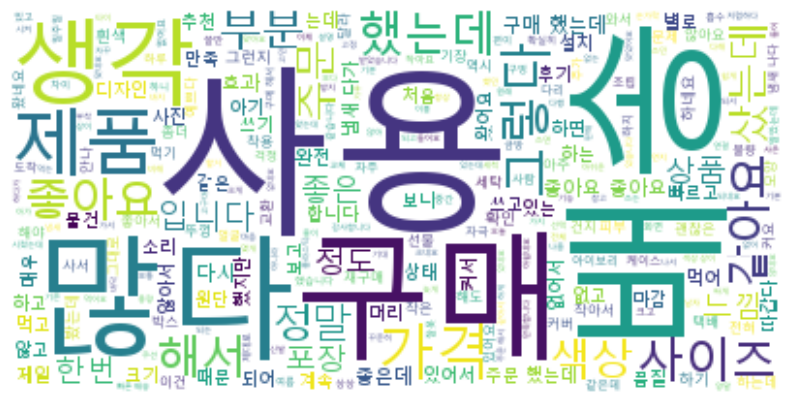

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show();

In [8]:
corpus_2 = ''.join(df2['tokenized_2'].tolist())
corpus_2

'지나도 접착 력 그대로 예요 ~~괜찮네 yo !사이즈 크게 시켰는데 잘 맞아요 ㅋㅋㅋ5 센치 토퍼 사용 하는데 사이즈 잘 맞고 좋았아요 . 배송 은 늦게 왔네요 ...필수 입니다 구매 하세요승무원 스프레이 라고 하는지 알겠네요 짱 이에요 . 흡수 력 광택 @@배송 느리고 상자 제품 만들어있네요 사용설명서 없어요 남자 는 상관없다 없지만 여자 분들 은 난감할수도 있겠네요지속 력 좋으면 너무 좋을가 같아요싼 맛 먹어요 ㅋㅋㅋ후기 너무 좋아서 구매 . 외관 케이스 랑은 너무 따갑다 큼하고 있는데 치약 쓴 편이 에요 . 맛 끝 쓴맛 너무 써서 랑 신랑 이랑은 맞는거 같아요 ㅜㅜ상품 good 배송 good운동복 화 220 사이즈 신는데 230 주문 했더니 작아서 교환 .비싸요 .. 맛 잇네요 번창 하세요ㅡㄹ 사용 븨니전체 적 대가 약해 보임 가격 비해 수납 공간 은 괜찮았습니다고구마 랑은 맞네요 ㅠㅠ 포장 은 정말 따갑다 끔사진 없이 정확합니다 . 플라스틱 보니 정전기 잘 일어서 고양이 털 들러붙어 지저분해지는건 어쩔 수가 없네요 .배송 예상 날짜 잘 도착 .너무 잘 샀다 생각 하네요 잘쓸게요 ~5 샀는데 잘 됐 어유 ^^변하지 않는 꾀 돌이 👍밀키스 맛 이랑 비슷한 같아요 ~가격 품질 면 사야 한다고 생각 합니다수평 잘 맞긴하는데 예쁘긴 합다 !색상 상이 흰색 상상 었 더라면 좋을 듯 하고 , 크기 는 작은데 결부 분 헐겁지 않다면 100% 만족 입니다 .알러지 케어 라고 했는데 아들 재채기 거나 비염 증상 서 세탁 살균 건조기 다해 봤는데 못 덮는 중이아이패드 12.9 3 세대 충전 잘 하고 있습니다 가격 쎈것만 빼면 만족도 높아요 무거워 ㅋㅋ득 득 득 해진다 득 득허벅지 랑 엉덩이 커서 라지 했는데 잘 맞아요 ~ 밑위 짧네요 ㅋㅋ 워터파크 필수 템 !!한두 달용 으론 이만 없는듯 근데 생긴거 완 다르게 생각 보다 오래 못 써요 ㅋㅋ생각 보다 강해서 한번 제대로 해보고나서 재 구매 결정 할것 같아요거치 링 사이즈 맞네요 사용 못 합니다가격 만큼은 하네요 . 잘 받

In [9]:
wc = WordCloud(
    font_path = 'malgun',
    background_color = 'white',
    max_words = 2000
)
wc = wc.generate(corpus_2)
wc.words_

{'잘': 1.0,
 '은': 0.6469816272965879,
 '는': 0.5656167979002624,
 '너무': 0.489501312335958,
 '사용': 0.2887139107611549,
 '맛': 0.27034120734908135,
 '배송': 0.25196850393700787,
 '같아요': 0.24015748031496062,
 '가격': 0.23097112860892388,
 '못': 0.22572178477690288,
 '많다': 0.20341207349081364,
 '구매': 0.20078740157480315,
 '보다': 0.18635170603674542,
 '사이즈': 0.1837270341207349,
 '생각 보다': 0.1784776902887139,
 '근데': 0.17191601049868765,
 '제품': 0.17060367454068243,
 '그렇다': 0.17060367454068243,
 '입니다': 0.1679790026246719,
 '좋아요': 0.16404199475065617,
 '서': 0.15616797900262466,
 '했는데': 0.14566929133858267,
 '재구매': 0.14173228346456693,
 '인데': 0.14041994750656167,
 '정말': 0.13648293963254593,
 '해서': 0.13648293963254593,
 '이라': 0.13648293963254593,
 '아직': 0.13648293963254593,
 '하고': 0.12860892388451445,
 'ㅠㅠ': 0.12467191601049869,
 '굿': 0.1220472440944882,
 'ㅠ': 0.1220472440944882,
 '샀는데': 0.11548556430446194,
 '부분': 0.11286089238845144,
 '느낌': 0.11023622047244094,
 '색상': 0.10761154855643044,
 '엔': 0.1049868

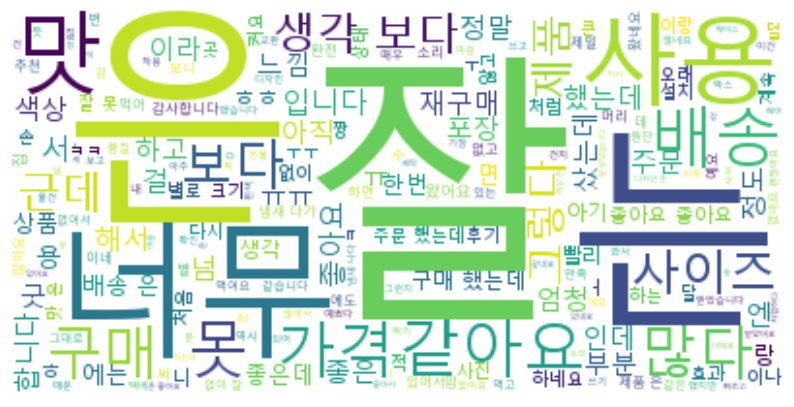

In [10]:
plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show();

## 정리

#### 왜 token2(모든 형태소)가 token1(명사, 형용사, 동사) 보다 성능이 좋은가?
- _token1로 잘 예측하지 못한 경우(①)_ 와 _token2로 잘 예측한 경우(②)_ 비교
<br/>①에는 2글자 이상의 token의 발생 빈도가 높은 반면,
<br/>②에는 한 글자 토큰의 발생 빈도가 높았음
<br/>&nbsp;&nbsp;&nbsp;&nbsp;잘, 은, 는, 맛, 못, 굿, ㅠ, 넘 등 한 글자 token,
<br/>&nbsp;&nbsp;&nbsp;&nbsp;또는 '너무, ~보다'와 같은 부사가 존재

<br/>즉, token2는 의미있는 형태소가 더 잘 추출되었다고 볼 수 있음.